In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [21]:
row_data = pd.read_csv('../data/tokyo2016.csv', index_col=None)

In [22]:
df = row_data.reset_index()

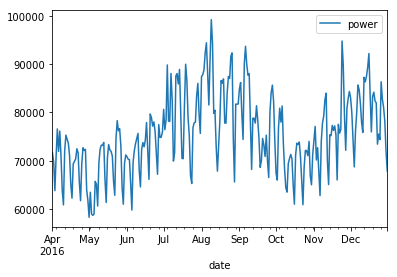

In [28]:
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
df['power'] = df['power'].values.astype('int')
daily_data = df.groupby('date')['power'].sum().reset_index()
daily_data = daily_data.set_index(['date'])
daily_data.plot()

/Users/gotouyuuki/anaconda/lib/python3.6/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


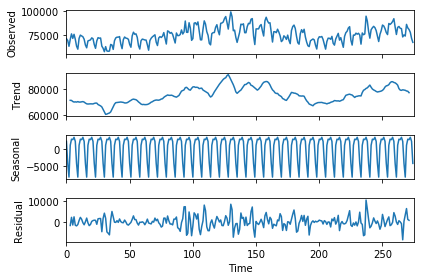

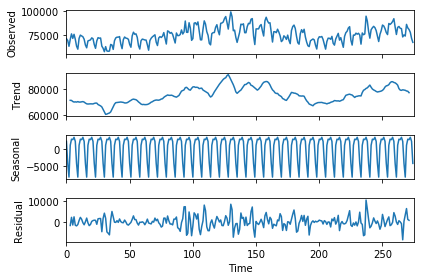

In [32]:
res = sm.tsa.seasonal_decompose(daily_data.values, freq=7)
res.plot()

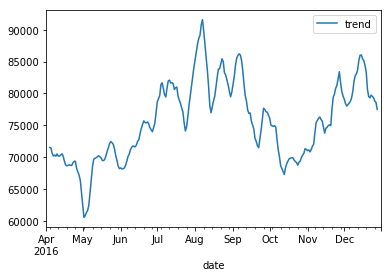

In [35]:
trend = res.trend
trend = pd.DataFrame({'trend': trend, 'date':daily_data.index})
trend['date'] = pd.to_datetime(trend['date'], format='%Y-%m-%d')
trend = trend.set_index(['date'])
trend = trend.plot()

In [38]:
seasonal_data = res.seasonal
seasonal = pd.DataFrame({'seasonal': seasonal_data, 'date': daily_data.index})
seasonal['date'] = pd.to_datetime(seasonal['date'], format='%Y-%m%d')
seasonal['weekday'] = seasonal['date'].dt.dayofweek
seasonal[0:7]

,date,seasonal,weekday
0,2016-04-01,2289.023493,4
1,2016-04-02,-4295.653199,5
2,2016-04-03,-8398.138161,6
3,2016-04-04,1140.969415,0
4,2016-04-05,2947.929122,1
5,2016-04-06,2809.665386,2
6,2016-04-07,3506.203944,3
